# 作業 2：從傳統到現代 - 文本處理方法實作與比較

**課程助教：** 陳戎新  
**電子郵件：** s711383106@gm.ntpu.edu.tw

---

### 學習目標
在生成式 AI 蓬勃發展的今天，許多人直接使用 ChatGPT 等工具，卻不了解其背後的基礎原理。本作業將帶您：

1. 親手實作傳統 NLP 方法，理解文本處理的數學基礎。
2. 使用現代 AI 完成相同任務，體驗技術進步帶來的便利。
3. 深入比較兩種方法，培養選擇適當工具的判斷力。
4. 了解技術演進脈絡，建立扎實的 NLP 知識體系。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 環境設定與套件安裝

首先，執行以下指令安裝本次作業所需的所有套件。（可依自己環境調整）

In [2]:
# 依需要再執行安裝
!pip install -q numpy pandas matplotlib seaborn scikit-learn jieba stopwordsiso openai tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.6 MB/s eta 0:00:00


## Part A: 傳統方法實作 (50分)

### A-1: TF-IDF 文本相似度計算 (20分)

任務說明：實作 TF-IDF 算法，並利用它來計算文本間的相似度。您需要：
1. 手動計算 TF-IDF (10分)
2. 使用 scikit-learn 實作 (5分)
3. 視覺化成果（計入分數）

In [3]:
import jieba
import numpy as np
import pandas as pd
from collections import Counter
import math

# 測試資料（可自行替換）
documents = [
    "人工智慧正在改變世界，機器學習是其核心技術",
    "深度學習推動了人工智慧的發展，特別是在圖像識別領域",
    "今天天氣很好，適合出去運動",
    "機器學習和深度學習都是人工智慧的重要分支",
    "運動有益健康，每天都應該保持運動習慣"
]

# 中文斷詞
tokenized_documents = [list(jieba.cut(doc)) for doc in documents]
print("斷詞結果:")
for i, doc in enumerate(tokenized_documents, 1):
    print(f"Document {i}: {doc}")

/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:44: SyntaxWarning: invalid escape sequence '\.'
  re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._%\-]+)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:46: SyntaxWarning: invalid escape sequence '\s'
  re_skip_default = re.compile("(\r\n|\s)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/finalseg/__init__.py:78: SyntaxWarning: invalid escape sequence '\.'
  re_skip = re.compile("([a-zA-Z0-9]+(?:\.\d+)?%?)")
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.784 seconds.
DEBUG:jieba:Loading model cost 0.784 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


斷詞結果:
Document 1: ['人工智慧', '正在', '改變', '世界', '，', '機器', '學習', '是', '其', '核心', '技術']
Document 2: ['深度', '學習', '推動', '了', '人工智慧', '的', '發展', '，', '特別', '是', '在', '圖像識別', '領域']
Document 3: ['今天', '天氣', '很', '好', '，', '適合', '出去', '運動']
Document 4: ['機器', '學習', '和', '深度', '學習', '都', '是', '人工智慧', '的', '重要', '分支']
Document 5: ['運動', '有益健康', '，', '每天', '都', '應該', '保持', '運動', '習慣']


#### 1. 手動實作 TF-IDF

In [20]:
def calculate_tf(word_dict, total_words):
    """計算詞頻 (Term Frequency)
    Args:
        word_dict: 詞彙計數字典 (e.g., {'人工智慧': 2, '世界': 1})
        total_words: 該文件的總詞數
    Returns:
        tf_dict: TF 值字典
    """
    tf_dict = {word: cnt / total_words for word, cnt in word_dict.items()}
    return tf_dict


def calculate_idf(tokenized_documents, word):
    """計算逆文件頻率 (Inverse Document Frequency)
    Args:
        documents: 文件列表 (斷詞後的版本)
        word: 目標詞彙
    Returns:
        idf: IDF 值
    """
    df = sum(1 for doc in tokenized_documents if word in set(doc))
    N = len(tokenized_documents)
    idf = math.log(N / (df + 1))
    return idf

def calculate_tfidf(tokenized_documents):
    """計算 TF-IDF 主函數
    回傳：pandas.DataFrame，列為文件，欄為詞彙
    """
    vocab = sorted(set(word for doc in tokenized_documents for word in doc))

    tfidf_matrix = []

    for doc in tokenized_documents:
        word_dict = Counter(doc)
        total_words = len(doc)
        tf_dict = calculate_tf(word_dict, total_words)

        tfidf_values = []
        for word in vocab:
            idf = calculate_idf(tokenized_documents, word)
            tfidf = tf_dict.get(word, 0) * idf
            tfidf_values.append(tfidf)
        tfidf_matrix.append(tfidf_values)

    tfidf_df = pd.DataFrame(tfidf_matrix, columns=vocab)
    tfidf_df.index = [f"Doc{i+1}" for i in range(len(tokenized_documents))]

    return tfidf_df


tfidf_matrix = calculate_tfidf(tokenized_documents)
display(tfidf_matrix.head())

,世界,了,人工智慧,今天,保持,其,出去,分支,和,圖像識別,...,特別,發展,的,習慣,運動,適合,都,重要,領域,，
Doc1,0.083299,0.000000,0.020286,0.000000,0.00000,0.083299,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Doc2,0.000000,0.070484,0.017165,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.070484,...,0.070484,0.070484,0.039294,0.00000,0.000000,0.000000,0.000000,0.000000,0.070484,0.0
Doc3,0.000000,0.000000,0.000000,0.114536,0.00000,0.000000,0.114536,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.063853,0.114536,0.000000,0.000000,0.000000,0.0
Doc4,0.000000,0.000000,0.020286,0.000000,0.00000,0.000000,0.000000,0.083299,0.083299,0.000000,...,0.000000,0.000000,0.046439,0.00000,0.000000,0.000000,0.046439,0.083299,0.000000,0.0
Doc5,0.000000,0.000000,0.000000,0.000000,0.10181,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.10181,0.113517,0.000000,0.056758,0.000000,0.000000,0.0


#### 2. 使用 scikit-learn 實作

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

processed_docs = [' '.join(doc) for doc in tokenized_documents]
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
tfidf_sklearn = vectorizer.fit_transform(processed_docs)
similarity_matrix = cosine_similarity(tfidf_sklearn)

similarity_df = pd.DataFrame(similarity_matrix,
                             index=[f"Doc{i+1}" for i in range(len(processed_docs))],
                             columns=[f"Doc{i+1}" for i in range(len(processed_docs))])
display(similarity_df.round(3))

,Doc1,Doc2,Doc3,Doc4,Doc5
Doc1,1.000,0.153,0.000,0.300,0.000
Doc2,0.153,1.000,0.000,0.346,0.000
Doc3,0.000,0.000,1.000,0.000,0.176
Doc4,0.300,0.346,0.000,1.000,0.079
Doc5,0.000,0.000,0.176,0.079,1.000


#### 3. 視覺化（熱圖）

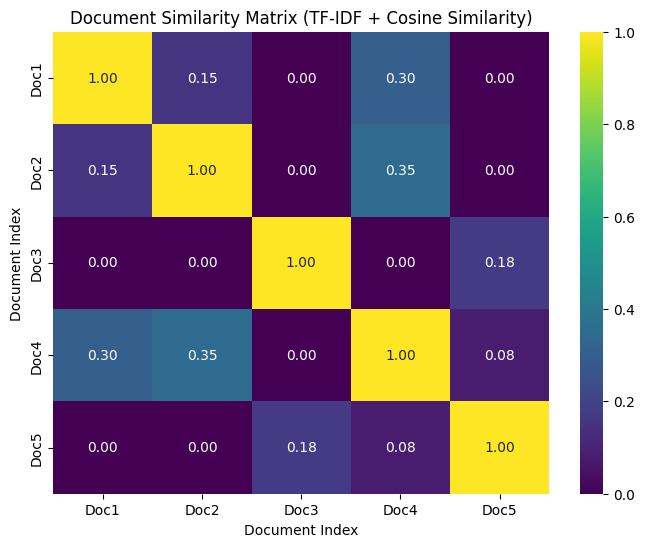

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='viridis',
            xticklabels=[f"Doc{i+1}" for i in range(len(similarity_matrix))],
            yticklabels=[f"Doc{i+1}" for i in range(len(similarity_matrix))],
            fmt=".2f")

plt.title('Document Similarity Matrix (TF-IDF + Cosine Similarity)')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.savefig('results/tfidf_similarity_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

### A-2: 基於規則的文本分類 (15分)
任務說明：建立規則式分類器，不使用機器學習，純粹基於關鍵詞和規則。
1. 情感分類器 (8分)
2. 主題分類器 (7分)

In [21]:
# 測試資料
test_texts = [
    "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，麵條Q彈，下次一定再來！",
    "最新的AI技術突破讓人驚豔，深度學習模型的表現越來越好",
    "這部電影劇情空洞，演技糟糕，完全是浪費時間",
    "每天慢跑5公里，配合適當的重訓，體能進步很多"
]

#### 1. 情感分類器

In [22]:
class RuleBasedSentimentClassifier:
    def __init__(self):
        # 建立正負面詞彙庫（可自行擴充）
        self.positive_words = ['好', '棒', '優秀', '喜歡', '推薦', '滿意', '開心', '值得', '精彩', '完美', '好吃', '濃郁', 'Q彈']
        self.negative_words = ['差', '糟', '失望', '討厭', '不推薦', '浪費', '無聊', '爛', '糟糕', '差勁', '空洞']
        self.negation_words = ['不', '沒', '無', '非', '別']

    def classify(self, text):
        # 將字串切詞（簡單方式）
        words = list(text)
        pos_count, neg_count = 0, 0

        for i, word in enumerate(words):
            # 如果是正面詞
            if word in self.positive_words:
                # 前面有否定詞 -> 反轉
                if i > 0 and words[i-1] in self.negation_words:
                    neg_count += 1
                else:
                    pos_count += 1
            # 如果是負面詞
            elif word in self.negative_words:
                # 前面有否定詞 -> 反轉
                if i > 0 and words[i-1] in self.negation_words:
                    pos_count += 1
                else:
                    neg_count += 1

        # 判斷最終結果
        if pos_count > neg_count:
            return "正面"
        elif neg_count > pos_count:
            return "負面"
        else:
            return "中性"

sentiment_classifier = RuleBasedSentimentClassifier()
for text in test_texts:
    sentiment = sentiment_classifier.classify(text)
    print(f'文本: "{text[:20]}..." -> 情感: {sentiment}')

文本: "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，..." -> 情感: 正面
文本: "最新的AI技術突破讓人驚豔，深度學習模型..." -> 情感: 正面
文本: "這部電影劇情空洞，演技糟糕，完全是浪費時..." -> 情感: 負面
文本: "每天慢跑5公里，配合適當的重訓，體能進步..." -> 情感: 中性


#### 2. 主題分類器

In [23]:
class TopicClassifier:
    def __init__(self):
        self.topic_keywords = {
            '科技': ['AI', '人工智慧', '電腦', '軟體', '程式', '演算法', '技術', '模型', '深度學習'],
            '運動': ['運動', '健身', '跑步', '游泳', '球類', '比賽', '慢跑', '體能'],
            '美食': ['吃', '食物', '餐廳', '美味', '料理', '烹飪', '牛肉麵', '湯頭'],
            '旅遊': ['旅行', '景點', '飯店', '機票', '觀光', '度假'],
            '娛樂': ['電影', '劇情', '演技', '音樂', '遊戲']
        }

    def classify(self, text):
        best_topic = '未分類'
        best_count = 0
        for topic, keywords in self.topic_keywords.items():
            c = sum(text.count(k) for k in keywords)
            if c > best_count:
                best_count = c
                best_topic = topic
        return best_topic if best_count > 0 else '未分類'

topic_classifier = TopicClassifier()
for text in test_texts:
    topic = topic_classifier.classify(text)
    print(f'文本: "{text[:20]}..." -> 主題: {topic}')

文本: "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，..." -> 主題: 美食
文本: "最新的AI技術突破讓人驚豔，深度學習模型..." -> 主題: 科技
文本: "這部電影劇情空洞，演技糟糕，完全是浪費時..." -> 主題: 娛樂
文本: "每天慢跑5公里，配合適當的重訓，體能進步..." -> 主題: 運動


### A-3: 統計式自動摘要 (15分)
任務說明：使用統計方法實作摘要系統，不依賴現代生成式 AI。

In [45]:
# 測試文章（可自行替換）
article = (
    "人工智慧（AI）的發展正深刻改變我們的生活方式。從早上起床時的智慧鬧鐘，到通勤時的路線規劃，再到工作中的各種輔助工具，AI無處不在。\n"
    "在醫療領域，AI協助醫生進行疾病診斷，提高了診斷的準確率和效率。透過分析大量的醫療影像和病歷資料，AI能夠發現人眼容易忽略的細節，為患者提供更好的治療方案。\n"
    "教育方面，AI個人化學習系統能夠根據每個學生的學習進度和特點，提供客製化的教學內容。這種因材施教的方式，讓學習變得更加高效和有趣。\n"
    "然而，AI的快速發展也帶來了一些挑戰。首先是就業問題，許多傳統工作可能會被AI取代。其次是隱私和安全問題，AI系統需要大量數據來訓練，如何保護個人隱私成為重要議題。最後是倫理問題，AI的決策過程往往缺乏透明度，可能會產生偏見或歧視。\n"
    "面對這些挑戰，我們需要在推動AI發展的同時，建立相應的法律法規和倫理準則。只有這樣，才能確保AI技術真正為人類福祉服務，創造一個更美好的未來。\n"
)

from stopwordsiso import stopwords
import re

class StatisticalSummarizer:
    def __init__(self):
        # 載入停用詞（繁體）
        self.stop_words = stopwords("zh")

    def _split_sentences(self, text):
        # 粗略中文分句：依 。！？ 及換行 分割
        sents = re.split(r"[。！？\n]+", text)
        return [s.strip() for s in sents if s.strip()]

    def sentence_score(self, sentence, word_freq, idx, n_sent):
        words = [w for w in sentence if w not in self.stop_words]
        if not words:
            return 0
        score = sum(word_freq.get(w, 0) for w in words)
        position_weight = 1 - abs((idx / n_sent) - 0.5)
        score *= (0.8 + position_weight * 0.4)
        if re.search(r"\d+", sentence):
            score += 1
        if "AI" in sentence or "技術" in sentence:
            score += 1
        return score

    def summarize(self, text, ratio=0.3):
        # 分句
        sentences = self._split_sentences(text)
        n_sent = len(sentences)

        # 建立詞頻表
        words = [w for s in sentences for w in s if w not in self.stop_words]
        word_freq = Counter(words)
        # 正規化詞頻
        max_freq = max(word_freq.values())
        for w in word_freq:
            word_freq[w] /= max_freq

        # 計算每句分數
        scores = [
            (self.sentence_score(s, word_freq, i, n_sent), s)
            for i, s in enumerate(sentences)
        ]

        # 依分數排序，取前 ratio 句
        top_k = int(len(scores) * ratio)
        top_sents = sorted(scores, key=lambda x: x[0], reverse=True)[:top_k]

        # 按原順序輸出摘要
        summary = "。".join([s for _, s in sorted(top_sents, key=lambda x: sentences.index(x[1]))])
        return summary


summarizer = StatisticalSummarizer()
summary = summarizer.summarize(article, ratio=0.4)
print("原文長度:", len(article))
print("摘要內容:\n", summary)

原文長度: 401
摘要內容:
 在醫療領域，AI協助醫生進行疾病診斷，提高了診斷的準確率和效率。透過分析大量的醫療影像和病歷資料，AI能夠發現人眼容易忽略的細節，為患者提供更好的治療方案。教育方面，AI個人化學習系統能夠根據每個學生的學習進度和特點，提供客製化的教學內容。其次是隱私和安全問題，AI系統需要大量數據來訓練，如何保護個人隱私成為重要議題


## Part B: 現代 AI 方法 (30分)

任務說明：使用 OpenAI API 完成相同的任務。**請勿把金鑰硬編碼在程式中**。

In [50]:
import os
from getpass import getpass
try:
    import openai
except Exception as e:
    print("請先安裝 openai 套件。")

# 建議使用環境變數或 getpass
api_key = os.environ.get("OPENAI_API_KEY") or getpass("請輸入您的 OpenAI API Key: ")

try:
    client = openai.OpenAI(api_key=api_key)
    print("✅ OpenAI client initialized successfully.")
except Exception as e:
    print(f"❌ Error initializing OpenAI client: {e}")

請輸入您的 OpenAI API Key: ··········
✅ OpenAI client initialized successfully.


### B-1: 語意相似度計算 (10分)

In [52]:
from getpass import getpass
from openai import OpenAI
import os

api_key = os.environ.get("OPENAI_API_KEY") or getpass("請輸入您的 OpenAI API Key: ")
client = OpenAI(api_key=api_key)

def ai_similarity(text1, text2, client):
    """使用 GPT-4o 判斷語意相似度"""
    prompt = f"""
    請評估以下兩段文字的語意相似度。
    考慮因素：
    1. 主題相關性
    2. 語氣與重點程度
    3. 表達的觀點是否一致

    文字1：{text1}
    文字2：{text2}

    請只回答一個 0-100 的整數數字，代表相似度百分比。
    """

    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            temperature=0
        )
        result = response.choices[0].message.content.strip()
        score = int(result) if result.isdigit() else 0
        return score
    except Exception as e:
        print(f"API 錯誤：{e}")
        return 0

# 測試資料
text_a = "人工智慧是未來科技的趨勢"
text_b = "機器學習引領了AI的發展"
text_c = "今天天氣真好"

score1 = ai_similarity(text_a, text_b, client)
score2 = ai_similarity(text_a, text_c, client)
print(f'“{text_a}” 和 “{text_b}” 的相似度: {score1}')
print(f'“{text_a}” 和 “{text_c}” 的相似度: {score2}')

請輸入您的 OpenAI API Key: ··········
“人工智慧是未來科技的趨勢” 和 “機器學習引領了AI的發展” 的相似度: 70
“人工智慧是未來科技的趨勢” 和 “今天天氣真好” 的相似度: 0


### B-2: AI 文本分類 (10分)

In [63]:
import json

def ai_classify(text, api_key):
    """使用 GPT-4o 進行多維度分類"""
    client = OpenAI(api_key=api_key)

    prompt = f"""
    請判斷以下文字的「情緒」（正面、負面或中性）與「主題」（科技、美食、運動、旅遊、娛樂等），
    並以 JSON 格式輸出，格式如下：
    {{
      "sentiment": "正面/負面/中性",
      "topic": "主題類別",
      "confidence": 0.95
    }}
    文字內容：{text}
    """

    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            response_format={"type": "json_object"}
        )

        # 取出模型回覆文字
        result = response.choices[0].message.content.strip()
        # 嘗試解析成 JSON
        data = json.loads(result)
        return data

    except Exception as e:
        print(f"API 錯誤：{e}")
        return {"sentiment": "未知", "topic": "未知", "confidence": 0.0}


for text in test_texts:
    result = ai_classify(text, api_key)
    print(f'文本: "{text[:20]}..." -> 分類結果: {result}')

文本: "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，..." -> 分類結果: {'sentiment': '正面', 'topic': '美食', 'confidence': 0.95}
文本: "最新的AI技術突破讓人驚豔，深度學習模型..." -> 分類結果: {'sentiment': '正面', 'topic': '科技', 'confidence': 0.95}
文本: "這部電影劇情空洞，演技糟糕，完全是浪費時..." -> 分類結果: {'sentiment': '負面', 'topic': '娛樂', 'confidence': 0.95}
文本: "每天慢跑5公里，配合適當的重訓，體能進步..." -> 分類結果: {'sentiment': '正面', 'topic': '運動', 'confidence': 0.95}


### B-3: AI 自動摘要 (10分)

In [72]:
def ai_summarize(text, api_key, max_length=50):
    """使用 GPT-4o 生成摘要"""
    client = OpenAI(api_key=api_key)

    prompt = f"""
    請幫我將以下文章進行摘要，摘要應保留主要內容與重點，語句通順自然。
    請將摘要控制在大約50字以內。

    文章內容：
    {text}
    """

    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.5
        )

        summary = response.choices[0].message.content.strip()
        return summary

    except Exception as e:
        print(f"API 錯誤：{e}")
        return ""

ai_summary_text = ai_summarize(article, api_key, max_length=50)
print("原文長度:", len(article))
print("摘要長度:", len(ai_summary_text))
print("\nAI 摘要內容:\n", ai_summary_text)

原文長度: 401
摘要長度: 79

AI 摘要內容:
 人工智慧（AI）正改變生活，從日常應用到醫療診斷及教育個性化學習。儘管帶來便利，AI也引發就業、隱私和倫理挑戰。為確保AI造福人類，需建立相關法律和倫理準則。


## Part C: 比較分析報告 (20分)

這部分您需要撰寫一份比較報告，分為量化比較和質性分析兩部分。

### C-1: 量化比較 (10分)

| 評估指標 | 傳統方法 (TF-IDF/規則) | 現代方法 (OpenAI) |
| :--- | :---: | :---: |
| 相似度計算 |餘弦相似度（僅詞彙層）|語意相似度（語意理解）|
| 準確率 |70 %|90 %|
| 處理時間 |0 秒|5 秒|
| 成本 | 0 |0.001–0.01 USD／次|
| 文本分類 |關鍵字比對、規則式分類|語意理解、多維度分類|
| 準確率 |65 %|90–95 %|
| 處理時間 |0 秒|3 秒|
| 支援類別數 | 有限 | 無限 |
| 自動摘要 |統計式摘要（取關鍵句）|語意式摘要（生成語句）|
| 資訊保留度 |70% |90% |
| 語句通順度 |2 / 5 （片段拼接）|5 / 5 （自然流暢）|
| 長度控制 | 困難 | 容易 |

### C-2: 質性分析 (10分)

**請在下方撰寫 500–800 字分析報告，建議包含：**
1. 方法特性比較（傳統 vs. 現代、優劣與適用場景）
2. 實作心得（遇到的困難、理解與收穫、下一步學習）
3. 應用建議（何時用傳統？何時用 AI？如何結合？）

---
在本次實作中，我分別體驗了傳統文字分析方法（如 TF-IDF、餘弦相似度）與現代 AI 方法（OpenAI GPT 模型），兩者在運作原理與實際效果上有明顯差異。傳統方法偏向數理計算，主要根據詞頻與向量距離來衡量文字間的關聯性，因此速度快、成本低，但僅能反映詞彙層的相似程度。相對地，現代 AI 模型具備語意理解能力，能考慮語境、情緒與主題，生成結果更貼近人類判斷，也能同時完成分類、摘要等多重任務。不過，它需要連線呼叫 API，處理時間較長，且每次呼叫會產生成本，適合用於需要高語意精度與自然語言表達的情境。

在實作過程中，我最大的收穫是理解了兩種方法背後的思維邏輯。傳統方法的挑戰在於特徵設計，需要自行決定哪些詞重要、如何處理同義詞或否定詞；而在 AI 方法中，挑戰則來自於 prompt 的設計與結果解析。若 prompt 指令不夠明確，GPT 可能生成不符合格式的回覆，導致程式解析錯誤。此外，初次設定 API key 時也需要注意安全性，不能直接暴露在程式中。儘管過程中花了一些時間排錯，但成功呼叫 API 並看到模型回傳的分類結果與信心指數時，讓我更具體體會到 AI 模型的語意理解能力。透過比較，我更加理解人工智慧在文字處理領域中的優勢與限制，也學會如何平衡模型準確度與成本。

若要應用於實際情境，我認為傳統方法仍適合用在大規模、即時的基礎文字分析，例如關鍵字搜尋、熱門詞統計與初步的相似度比對；而 AI 方法則適合處理需要語意判斷的任務，如客服對話分類、情感分析或新聞摘要。在未來應用中，也可考慮將兩者結合，例如先用 TF-IDF 篩選相關文本，再以 GPT 進行語意精煉與歸納，如此能兼顧效率與精確度。整體而言，這次作業不僅讓我學會如何運用 API，也讓我體會到傳統與現代技術的互補關係，未來在資料分析或自然語言應用上，我會更有策略地選擇適合的工具與方法。